In [0]:
import pandas as pd
import random 
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians

In [0]:
fields = ['city', 'geo_lat', 'geo_lon', 'population']

dataset = pd.read_csv('city.csv', skipinitialspace=True, usecols=fields)
dataset.sort_values("population", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

cities = dataset.values[0:30, :]

In [0]:
def random_start(path):
    return path

def get_distance(city_u, city_v):
    R = 6373.0

    lat1 = radians(city_u[1])
    lon1 = radians(city_u[2])
    lat2 = radians(city_v[1])
    lon2 = radians(city_v[2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def cost_function(path):
    dist = 0
    last_city = path[0]
    for city in path:
        dist += get_distance(last_city, city)
    return dist

def random_neighbour(path):
    city_u = random.randrange(0, 30, 1)
    city_v = random.randrange(0, 30, 1)

    npath = path.copy()
    npath[city_v] = path[city_u]
    npath[city_u] = path[city_v]
    return npath

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p


In [0]:
def annealing(path, random_start,
              cost_function,
              random_neighbour,
              acceptance,
              coolRate = 0.0001,
              temperature = 1,
              maxsteps=1000,
              debug=True):
    state = random_start(path)
    cost = cost_function(state)
    states, costs = [state], [cost]
    step = 0
    while temperature > 0.01:
        step = step + 1
        fraction = step / float(maxsteps)
        temperature = temperature - coolRate
        new_state = random_neighbour(state)
        new_cost = cost_function(new_state)
        if debug and step % 100 == 0: print("Step = ", step, "T = ", temperature, "Cost = ", cost, "NewCost = ", new_cost)
        if acceptance_probability(cost, new_cost, temperature) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [67]:
state, c, states, costs = annealing(cities, random_start, cost_function, random_neighbour, acceptance_probability, maxsteps=1000, debug=True);

Step =  100 T =  0.9900000000000011 Cost =  36572.69613497184 NewCost =  36572.69613497184
Step =  200 T =  0.9800000000000022 Cost =  36572.69613497184 NewCost =  44916.1787913117
Step =  300 T =  0.9700000000000033 Cost =  35934.00158088846 NewCost =  35934.00158088846
Step =  400 T =  0.9600000000000044 Cost =  35934.00158088845 NewCost =  35934.00158088845
Step =  500 T =  0.9500000000000055 Cost =  35934.00158088846 NewCost =  47872.192522313075
Step =  600 T =  0.9400000000000066 Cost =  35934.00158088846 NewCost =  35934.00158088846
Step =  700 T =  0.9300000000000077 Cost =  35934.00158088845 NewCost =  35934.00158088844
Step =  800 T =  0.9200000000000088 Cost =  35934.00158088845 NewCost =  35934.00158088844
Step =  900 T =  0.9100000000000099 Cost =  35934.00158088845 NewCost =  35934.00158088846
Step =  1000 T =  0.900000000000011 Cost =  35934.001580888464 NewCost =  50191.29957707631
Step =  1100 T =  0.8900000000000121 Cost =  35934.00158088844 NewCost =  35934.001580888

In [0]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    #plt.subplot(121)
    #plt.plot(states, 'r')
    #plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

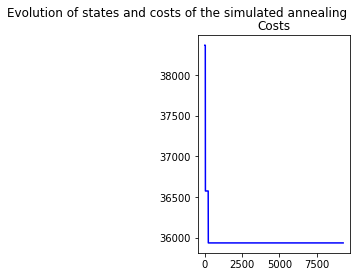

In [69]:
see_annealing(states, costs)